# Практическое задание к уроку 7

In [468]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# Часть 1

1. взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)

https://archive.ics.uci.edu/ml/datasets/Audit+Data

In [469]:
data_set=pd.read_csv('trial.csv')

In [470]:
data_set.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [471]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


In [472]:
#data_set.drop('Audit_Risk',inplace=True,axis=1)
#data_set.drop('Detection_Risk',inplace=True,axis=1)

In [473]:
data_set.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [474]:
cat_cols=[]
for column in data_set.columns:
    if data_set[column].value_counts().count()<14:
        cat_cols.append(column)
    print(column,data_set[column].value_counts().count())
cat_cols.remove('Risk')    

Sector_score 13
LOCATION_ID 45
PARA_A 363
SCORE_A 3
PARA_B 358
SCORE_B 3
TOTAL 471
numbers 5
Marks 3
Money_Value 328
MONEY_Marks 3
District 3
Loss 3
LOSS_SCORE 3
History 7
History_score 3
Score 17
Risk 2


2. сделать eda (как на занятии 6 с примером для оттока)

In [475]:
#Separating churn and non churn customers
churn     = data_set[data_set["Risk"] == 1]
not_churn = data_set[data_set["Risk"] == 0]

In [476]:
#labels
lab = data_set["Risk"].value_counts().keys().tolist()
#values
val = data_set["Risk"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [477]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Risk Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non Risk customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Risk customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non Risk customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

for i in cat_cols :
    plot_pie(i)    


In [478]:


#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Risk Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non Risk customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [479]:

    
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "Risk" ,ascending = True)
    classes = df["Risk"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Risk"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Risk"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "LOCATION_ID",
                                       values = df["LOCATION_ID"]),
                                  dict(label  = 'TOTAL',
                                       values = df['TOTAL']),
                                  dict(label  = 'Money_Value',
                                       values = df['Money_Value'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer attrition",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

#for all categorical columns plot pie
##

#for all categorical columns plot histogram    
#for i in num_cols :
#    histogram(i)

#scatter plot matrix
scatter_matrix(data_set)

3. сделать feature engineering
4. обучить любой классификатор (какой вам нравится)

In [480]:
data_set.drop('LOCATION_ID',inplace=True,axis=1)

In [481]:
from sklearn.model_selection import train_test_split

x_data = data_set.iloc[:,:-1]
y_data = data_set.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [482]:
from sklearn.metrics import f1_score


#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df


In [483]:
#x_data['LOCATION_ID'].value_counts()

In [484]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [485]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(name,y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0))
      
    df = pd.DataFrame({"Model"           : [name],
                       "Recall"          : [rec],
                       "Precision"       : [prc],
                       "f1_score"        : [f1],
                       "Area_under_curve": [roc],
                       })
    return df

    
report_1=evaluate_results("Standart",y_test, y_predict)

Classification results:
f1: 100.00%
roc: 100.00%
recall: 100.00%
precision: 100.00%


5. далее разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные (класс 1) примеры, а только лишь часть

In [486]:
mod_data = data_set.copy()
#get the indices of the positives samples
pos_ind = np.where(mod_data.iloc[:,-1].values == 1)[0]
#shuffle them
np.random.shuffle(pos_ind)
# leave just 25% of the positives marked
pos_sample_len = int(np.ceil(0.3 * len(pos_ind)))
print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Using 146/486 as positives and unlabeling the rest


In [487]:
mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod_data.iloc[:,-1].value_counts())

target variable:
 -1    630
 1    146
Name: class_test, dtype: int64


In [488]:
x_data = mod_data.iloc[:,:-2].values # just the X 
y_labeled = mod_data.iloc[:,-1].values # new class (just the P & U)
y_positive = mod_data.iloc[:,-2].values # original class


6. применить random negative sampling для построения классификатора в новых условиях

In [489]:
mod_data = mod_data.sample(frac=1)
neg_sample = mod_data[mod_data['class_test']==-1][:len(mod_data[mod_data['class_test']==1])]
sample_test = mod_data[mod_data['class_test']==-1][len(mod_data[mod_data['class_test']==1]):]
pos_sample = mod_data[mod_data['class_test']==1]
print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

(146, 18) (146, 18)


In [490]:
model = xgb.XGBClassifier()

model.fit(sample_train.iloc[:,:-2].values, 
          sample_train.iloc[:,-2].values)
y_predict = model.predict(sample_test.iloc[:,:-2].values)
report_2=evaluate_results('Random negativ',sample_test.iloc[:,-2].values, y_predict)

Classification results:
f1: 100.00%
roc: 100.00%
recall: 100.00%
precision: 100.00%


7. сравнить качество с решением из пункта 4 (построить отчет - таблицу метрик)

In [491]:
model_performances = pd.concat([report_1,report_2],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

In [492]:
model_performances

,Model,Recall,Precision,f1_score,Area_under_curve
0,Standart,1.0,1.0,1.0,1.0
1,Random negativ,1.0,1.0,1.0,1.0


# Часть 2

### 1. Придумать новые признаки (у нас их всего 5 было) - сделать дополнительный feature engineering

In [493]:
# Чтение данных
df_clients = pd.read_csv('./data/clients.csv', index_col='client_id')
df_train = pd.read_csv('./data/uplift_train.csv', index_col='client_id')
df_test = pd.read_csv('./data/uplift_test.csv', index_col='client_id')

In [494]:
# Извлечение признаков
df_features = df_clients.copy()
df_features['first_issue_time'] = \
    (pd.to_datetime(df_features['first_issue_date'])
     - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')
df_features['first_redeem_time'] = \
    (pd.to_datetime(df_features['first_redeem_date'])
     - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')
df_features['issue_redeem_delay'] = df_features['first_redeem_time'] \
    - df_features['first_issue_time']
df_features = df_features.drop(['first_issue_date', 'first_redeem_date'], axis=1)

indices_train = df_train.index
indices_test = df_test.index
indices_learn, indices_valid = train_test_split(df_train.index, 
                                                test_size=0.4, 
                                                random_state=12)

In [495]:
df_features.head()

,age,gender,first_issue_time,first_redeem_time,issue_redeem_delay
client_id,,,,,
000012768d,45,U,1501947648,1.515094e+09,13146559.0
000036f903,72,F,1491832463,1.492951e+09,1118613.0
000048b7a6,68,F,1544880791,NaN,NaN
000073194a,60,F,1495544174,1.511522e+09,15978107.0
00007c7133,67,U,1495469828,1.546277e+09,50806825.0


In [496]:
df_features.describe()

,age,first_issue_time,first_redeem_time,issue_redeem_delay
count,400162.000000,4.001620e+05,3.646930e+05,3.646930e+05
mean,46.488112,1.515519e+09,1.530007e+09,1.558871e+07
std,43.871218,1.759150e+07,1.888414e+07,1.351122e+07
min,-7491.000000,1.491330e+09,1.491904e+09,-3.701689e+06
25%,34.000000,1.500667e+09,1.514128e+09,5.368447e+06
50%,45.000000,1.510845e+09,1.528319e+09,1.148628e+07
75%,59.000000,1.529518e+09,1.546628e+09,2.185546e+07
max,1901.000000,1.552687e+09,1.574212e+09,8.198520e+07


In [497]:
df_features[df_features.age>100].age=df_features.age.mode()
df_features[df_features.age<1].age =df_features.age.mode()

In [498]:
X_train = df_features.loc[indices_learn, :]
y_train = df_train.loc[indices_learn, 'target']
treat_train = df_train.loc[indices_learn, 'treatment_flg']

X_val = df_features.loc[indices_valid, :]
y_val = df_train.loc[indices_valid, 'target']
treat_val =  df_train.loc[indices_valid, 'treatment_flg']

X_train_full = df_features.loc[indices_train, :]
y_train_full = df_train.loc[:, 'target']
treat_train_full = df_train.loc[:, 'treatment_flg']

X_test = df_features.loc[indices_test, :]

cat_features = ['gender']

models_results = {
    'approach'  : [],
    'uplift@30%': [],
    "logloss"   : [],
    "f1_score"  : [],
    "roc_auc"  : []   
}

### 2. Для подходов с одной моделью поварьировать параметры CatBoostClassifier либо даже попробовать другой алгоритм (опционально уже). 

In [499]:
from sklift.metrics import uplift_at_k
from sklift.metrics import uplift_auc_score

from sklift.viz import plot_uplift_preds
from sklift.models import SoloModel
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import log_loss, f1_score


# sklift поддерживает любые модели, 
# которые удовлетворяют соглашениями scikit-learn
# Для примера воспользуемся catboost
from catboost import CatBoostClassifier

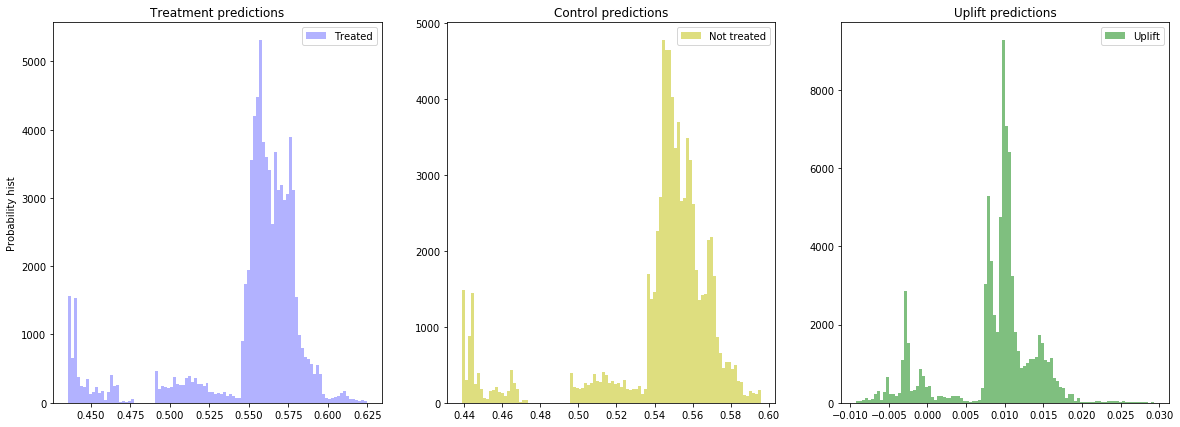

In [500]:
sm = SoloModel(CatBoostClassifier(learning_rate=0.01,iterations=50, thread_count=2, random_state=42, silent=True))
sm = sm.fit(X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})

uplift_sm = sm.predict(X_val)


sm_score = uplift_at_k(y_true=y_val, uplift=uplift_sm, treatment=treat_val, strategy='by_group', k=0.3)
lloss = log_loss(y_val, ((1+sm.predict(X_val))/2).round())
f1=f1_score(y_val, ((1+sm.predict(X_val))/2).round(), average='binary')
auc_score=uplift_auc_score(y_true=y_val, uplift=uplift_sm, treatment=treat_val)

models_results['approach'].append('SoloModel')
models_results['uplift@30%'].append(sm_score)
models_results["logloss"].append(lloss)
models_results["f1_score"].append(f1)
models_results["roc_auc"].append(auc_score)


# Получим условные вероятности выполнения целевого действия при взаимодействии для каждого объекта
sm_trmnt_preds = sm.trmnt_preds_
# И условные вероятности выполнения целевого действия без взаимодействия для каждого объекта
sm_ctrl_preds = sm.ctrl_preds_

# Отрисуем распределения вероятностей и их разность (uplift)
plot_uplift_preds(trmnt_preds=sm_trmnt_preds, ctrl_preds=sm_ctrl_preds);

In [501]:
#посмотрим на models_results
pd.DataFrame(data=models_results).sort_values('uplift@30%', ascending=False)

,approach,uplift@30%,logloss,f1_score,roc_auc
0,SoloModel,0.06958,12.426101,0.756934,0.026051


#### 4. Для пункта 2 (подходов на основе одной модели) вывести значимость признаков, основываясь на model.estimator.feature_importances_ и model.estimator.feature_names_.

In [502]:
sm.estimator.feature_importances_

array([ 5.5369501 ,  0.        ,  4.91975228, 60.47262323, 25.8056916 ,
        3.2649828 ])

In [503]:
sm.estimator.feature_names_

['age',
 'gender',
 'first_issue_time',
 'first_redeem_time',
 'issue_redeem_delay',
 'treatment']

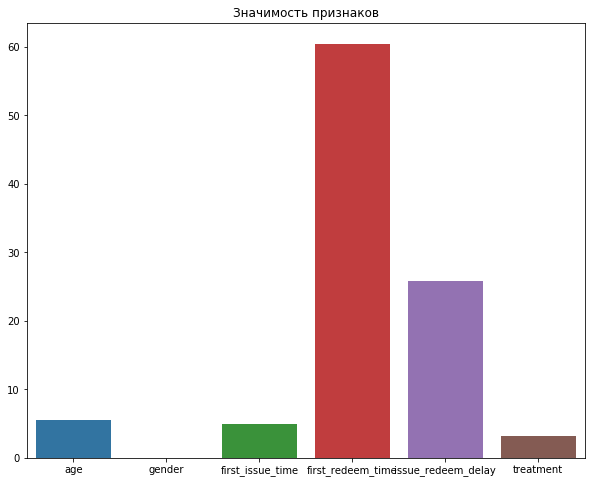

In [504]:
plt.figure(figsize=(10, 8))

sns.barplot(x=sm.estimator.feature_names_, y=sm.estimator.feature_importances_)

plt.title('Значимость признаков')
plt.show()

#### 4. Дополнить models_results дополнительными метриками (roc auc, logloss, f1). В конце вывести сводную таблицу всех показателей для всех подходов (как на основе

In [505]:
def set_metric(name,y_val,uplift_,treat_val):
    tm_score = uplift_at_k(y_true=y_val, uplift=uplift_, treatment=treat_val, strategy='by_group', k=0.3)
    lloss = log_loss(y_val, ((1+uplift_)/2).round())
    f1=f1_score(y_val, ((1+uplift_)/2).round(), average='binary')
    auc_score=uplift_auc_score(y_true=y_val, uplift=uplift_, treatment=treat_val)
    
    models_results['approach'].append(name)
    models_results['uplift@30%'].append(tm_score)
    models_results["logloss"].append(lloss)
    models_results["f1_score"].append(f1)
    models_results["roc_auc"].append(auc_score)
    

In [506]:
from sklift.models import ClassTransformation


ct = ClassTransformation(CatBoostClassifier(learning_rate=0.01,iterations=50, thread_count=2, random_state=42, silent=True))
ct = ct.fit(X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})

uplift_ct = ct.predict(X_val)

set_metric('ClassTransformation',y_val,uplift_ct,treat_val)


In [507]:
from sklift.models import TwoModels


tm = TwoModels(
    estimator_trmnt=CatBoostClassifier(learning_rate=0.01,iterations=50, thread_count=2, random_state=42, silent=True), 
    estimator_ctrl=CatBoostClassifier(learning_rate=0.01,iterations=50, thread_count=2, random_state=42, silent=True), 
    method='vanilla'
)
tm = tm.fit(
    X_train, y_train, treat_train,
    estimator_trmnt_fit_params={'cat_features': cat_features}, 
    estimator_ctrl_fit_params={'cat_features': cat_features}
)

uplift_tm = tm.predict(X_val)

set_metric('TwoModels',y_val,uplift_tm,treat_val)


In [508]:
tm_ctrl = TwoModels(
    estimator_trmnt=CatBoostClassifier(learning_rate=0.01,iterations=50, thread_count=2, random_state=42, silent=True), 
    estimator_ctrl=CatBoostClassifier(learning_rate=0.01,iterations=50, thread_count=2, random_state=42, silent=True), 
    method='ddr_control'
)
tm_ctrl = tm_ctrl.fit(
    X_train, y_train, treat_train,
    estimator_trmnt_fit_params={'cat_features': cat_features}, 
    estimator_ctrl_fit_params={'cat_features': cat_features}
)

uplift_tm_ctrl = tm_ctrl.predict(X_val)

set_metric('TwoModels_ddr_control',y_val,uplift_tm_ctrl,treat_val)


In [509]:
tm_trmnt = TwoModels(
    estimator_trmnt=CatBoostClassifier(learning_rate=0.01,iterations=50, thread_count=2, random_state=42, silent=True), 
    estimator_ctrl=CatBoostClassifier(learning_rate=0.01,iterations=50, thread_count=2, random_state=42, silent=True), 
    method='ddr_treatment'
)
tm_trmnt = tm_trmnt.fit(
    X_train, y_train, treat_train,
    estimator_trmnt_fit_params={'cat_features': cat_features}, 
    estimator_ctrl_fit_params={'cat_features': cat_features}
)

uplift_tm_trmnt = tm_trmnt.predict(X_val)

set_metric('TwoModels_ddr_treatment',y_val,uplift_tm_trmnt,treat_val)

In [510]:
#посмотрим на models_results
pd.DataFrame(data=models_results).sort_values('uplift@30%', ascending=False)

,approach,uplift@30%,logloss,f1_score,roc_auc
2,TwoModels,0.069672,12.553003,0.752740,0.025492
0,SoloModel,0.069580,12.426101,0.756934,0.026051
1,ClassTransformation,0.068654,13.261374,0.750702,0.026566
3,TwoModels_ddr_control,0.056747,12.340196,0.756271,0.020747
4,TwoModels_ddr_treatment,0.053791,12.618186,0.753146,0.019450
